# Método de Euler hacia adelante

**Objetivo**.

Resolver la ecuación de calor no estacionaria y sin fuentes en 1D usando el Método de Euler hacia adelante (explícito).

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/repomacti/macti/tree/main/notebooks/Analisis_Numerico_01">MACTI-Analisis_Numerico_01</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

**Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101922**

In [14]:
import numpy as np
import time
import matplotlib.pyplot as plt
import macti.visual as mvis
from macti.evaluation import *

def plot_initial_status(ax, x, u):
    ax.plot(x,[0 for i in x], '-', c='gray', lw=5)#, label='Malla')
    ax.plot(x,u,'r-',lw=2, label='Cond. inicial')
    ax.plot([0,0],[0,-1], 'k--', lw=1.0)
    ax.plot([1,1],[0,1], 'k--', lw=1.0)
    ax.scatter([0,1],[u[0], u[-1]], fc='blue', ec='k', alpha=0.75, label='Cond. de frontera')
    ax.grid()

In [15]:
quizz = Quizz('07', 'notebooks', 'local')

## <font color="DodgerBlue">Ejercicio 1.</font>

---

Definir:

* Coordenadas de la malla: $x$
* Arreglo para la solución final: $u$
* Valores de $u$ en la frontera.

---


In [16]:
# Parámetros físicos
L = 1.0
bA = -1   # Dirichlet en A
bB = 1    # Dirichlet en B
alpha = 1 # Parámetro físico
    
# Parámetros numéricos
N = 49
h = L / (N+1) # Tamaño de la malla
ht = 0.0001   # Paso del tiempo
Tmax = 1.0    # Tiempo total de simulación
ht = 0.0001
Nt = int(Tmax / ht) # Número total de pasos
r = ht * alpha / h**2 
tolerancia = 1e-6 # Criterio de termino anticipado

# Variables para medir el rendimiento
suma_tiempos = 0.0 # Tiempo total
error = []  # Errores

print(" h = {}, ht = {}, Tmax = {}, Nt = {}, r = {}".format(h, ht, Tmax, Nt, r))

# Preparación de arreglos (malla, solución)
# x = ...
# u = ...
# Condiciones de frontera
# u[0] = ...
# u[N+1] = ...

### BEGIN SOLUTION
# Preparación de arreglos (malla, solución)
x = np.linspace(0, L, N+2) # Coordenadas de la malla
u = np.zeros(N+2)        # Arreglo para la solución

# Condiciones de frontera
u[0] = bA
u[N+1] = bB

file_answer = FileAnswer()
file_answer.write('1', x, 'Las coordenadas de la malla están incorrectas.')
file_answer.write('2', u, 'El arreglo para la solución no está bien definido.')
### END SOLUTION


 h = 0.02, ht = 0.0001, Tmax = 1.0, Nt = 10000, r = 0.25


In [17]:
quizz.eval_numeric('1',x)

----------------------------------------
1 | Tu resultado es correcto.
----------------------------------------


In [18]:
quizz.eval_numeric('2',u)

----------------------------------------
2 | Tu resultado es correcto.
----------------------------------------


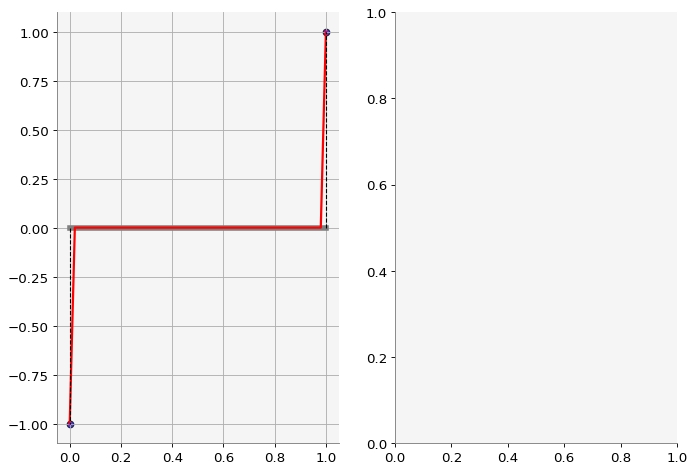

In [19]:
# Visualización de las condiciones iniciales y de frontera
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
plot_initial_status(ax1, x, u)
plt.show()

## <font color="DodgerBlue">Ejercicio 2.</font>

---

Completar el código con el algoritmos de Euler hacia adelante.

---

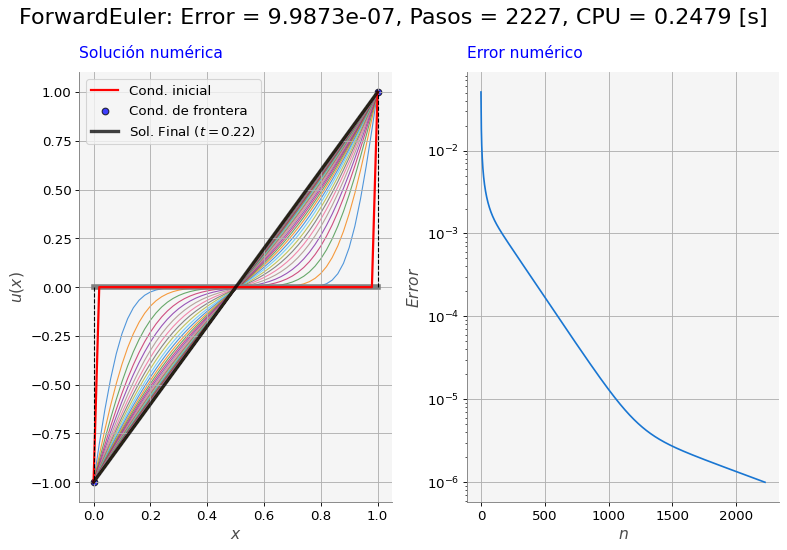

In [20]:
# Visualización de las condiciones iniciales y de frontera
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
plot_initial_status(ax1, x, u)

# Ciclo en el tiempo, desde 1 hasta Nt-1
for n in range(1, Nt):
    ### BEGIN SOLUTION
    e = 0.0
    t1 = time.perf_counter()
    for i in range(1, N+1):
        unew = u[i] + r * (u[i+1] - 2*u[i] + u[i-1])
        e += (unew - u[i])**2
        u[i] =  unew

    t2 = time.perf_counter()
    suma_tiempos += (t2 - t1)

    e = np.sqrt(h*e)
    error.append(e)
    ### END SOLUTION
    
    # Graficación cada 25 pasos
    if n % 25 == 0:
        ax1.plot(x,u,'-', lw = 1.0, alpha = 0.75, zorder=1)

    # Terminación anticipada si se cumple la tolerancia
    if e < tolerancia: 
        break

file_answer.write('3', error[-1], 'El error no está correctamente calculado.')
file_answer.write('4', n, 'El número de pasos no es el correcto, checa tu algoritmo.')

# Gráficación de resultados
titulo = 'ForwardEuler: Error = {:5.4e}, Pasos = {:4d}, CPU = {:5.4} [s]'.format(e, n, suma_tiempos)
fig.suptitle(titulo, fontsize=20)

ax1.plot(x,u,'-k',lw=3,alpha=0.75,label='Sol. Final ($t=${:3.2f})'.format(n*ht))
ax1.set_xlabel('$x$')
ax1.set_ylabel('$u(x)$')
ax1.set_title('Solución numérica', color='blue')
ax1.legend()

ax2.plot(error)
ax2.set_yscale('log')
ax2.set_xlabel('$n$')
ax2.set_ylabel('$Error$')
ax2.set_title('Error numérico', color='blue')
ax2.grid()

plt.tight_layout()
plt.show()

In [21]:
quizz.eval_numeric('3',error[-1])

----------------------------------------
3 | Tu resultado es correcto.
----------------------------------------


In [22]:
quizz.eval_numeric('4',n)

----------------------------------------
4 | Tu resultado es correcto.
----------------------------------------
